In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.signal import get_window
from scipy.fftpack import fft

In [2]:
def show_window_mag_freq_plot(win_name):
    # size of the window
    M = 63

    # hanning window is a raised cosine
    window = get_window(win_name, M)

    hM1 = int(np.floor((M+1)/2))
    hM2 = int(np.floor(M/2))


    N = 512
    hN = N//2

    fftbuffer = np.zeros(N)
    fftbuffer[:hM1] = window[hM2:]
    fftbuffer[N-hM2:] = window[:hM2]

    X = fft(fftbuffer)

    absX = np.abs(X)
    absX[absX < np.finfo(float).eps] = np.finfo(float).eps
    mX = 20*np.log10(absX)
    pX = np.angle(X)

    mX1 = np.zeros(N)
    pX1 = np.zeros(N)
    mX1[:hN] = mX[hN:]
    mX1[N-hN:] = mX[:hN]
    pX1[:hN] = pX[hN:]
    pX1[N-hN:] = pX[:hN]

    f, axes = plt.subplots(1, 1, figsize=(8, 6))
    ax = axes
    ax.plot(np.arange(-hN, hN)/N*M, mX1-max(mX1))
    ax.set_ylim([-120, 0])
    ax.set_xlim([-25, 25])
    ax.set_title(win_name + ' window')
    plt.show()

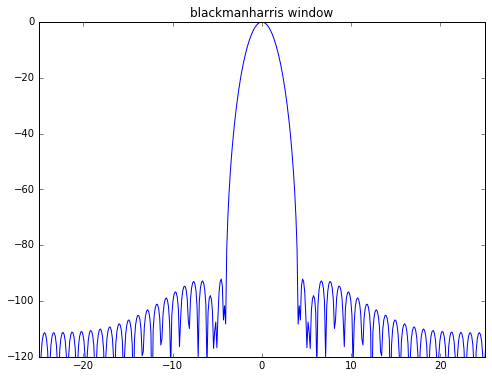

In [3]:
show_window_mag_freq_plot('blackmanharris')

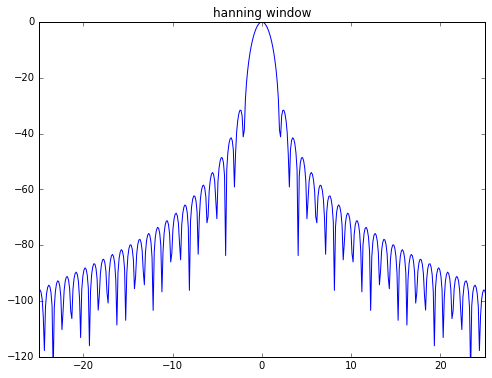

In [4]:
# hanning window is a raised cosine waveform
show_window_mag_freq_plot('hanning')

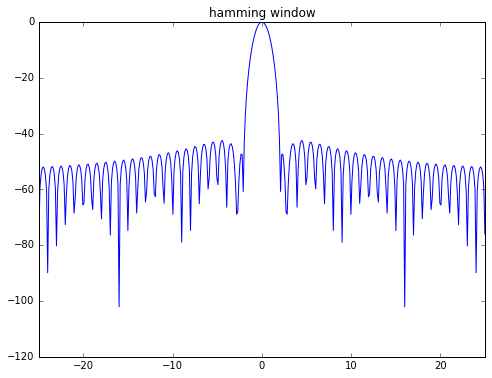

In [5]:
show_window_mag_freq_plot('hamming')